# Smart Energy building
LEMATTRE Benjamin - RENIER Julie

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

### I) Introduction

Les bâtiments consomment généralement environ 40 % de la consommation globale d'énergie et sont également responsables d’une part des émissions de carbone. La modélisation et le contrôle énergétique des bâtiments aident à développer des stratégies de réduction globale de la consommation d'énergie d'un bâtiment.
Un modèle de simulation de bâtiment typique a des entrées comme: la météo locale ; la géométrie du bâtiment ; les caractéristiques de l'enveloppe ; les gains de chaleur interne provenant de l'éclairage, des occupants et des charges d'équipement ; les spécifications des systèmes de chauffage, de ventilation et de refroidissement (HVAC).
L'objectif du BE était de concevoir un modèle de bâtiment et d'entreprendre des travaux de construction pertinents et des simulations d'énergie à l'aide de MATLAB avec les entrées appropriées et discuter des résultats.

### II) Hypothèses

Lors de la réalisation de la simulation du bâtiment, les hypothèses suivantes ont été prises en compte :
Température de surface uniforme sur chaque mur ou partie de mur.
Transfert de chaleur unidimensionnel dans chaque mur ou partie de mur.
Répartition diffuse du rayonnement solaire dans les pièces.
L'échange de rayonnement LW entre les surfaces extérieures et le sol est négligé.
Tous les transferts de chaleur sont traités comme des phénomènes linéaires.
On considère que la surface du mur extérieur et la surface du mur intérieur sont les mêmes pour chaque mur qui donne sur l'extérieur.
Tous les murs ont la même composition, qu’ils soient des murs qui donnent sur l'extérieur ou des murs qui séparent deux pièces.
Les fenêtres ont la même composition (simple vitrage)
Les HVAC ont la même température de consigne.


### III) Plan de l’appartement

Le studio que nous allons modéliser est un carré de 5 mètres de côté, il est composé de trois pièces avec des températures différentes ( T1 pour la pièce principale, T2 pour l’entrée et T3 pour la salle de bain).
Dans la pièce principale, Il y a une fenêtre qui donne sur l’extérieur, une porte qui donne sur la salle de bain, une porte qui donne sur l’entrée et une HVAC avec une température de consigne Tisp. Elle mesure 5 mètres de longueur et 3 mètres de largeur.
Dans la salle de bain, il y a une fenêtre, une porte qui donne sur la pièce principale et une HVAC. Elle mesure 2 mètres de longueur et 2 mètres de largeur.
Dans l’entrée , il y a une porte qui donne vers l’extérieur et une porte qui donne sur la pièce principale. 3 mètres de longueur et 2 mètres de largeur.

![](/plan_du_studio.png).

### IV) Description des composants

Les murs
Comme expliqué dans les hypothèses, tous les murs sont composés exactement pareil: même composant, même épaisseur, seul la surface du mur change pour chaque.

Les murs sont composés d’une première partie de béton (“concrete”), puis d’une deuxième partie isolation (“insulation”) (voir les caractéristiques de ces deux composants le tableau). 

![](/composition_du_mur.png).


Les fenêtres
Nous avons choisi du simple vitrage pour nos fenêtres, elles ont toutes une hauteur de 1,5 mètre, une largeur de 1 mètre et une épaisseur de 0,004 mètre.

Les portes
Les portes sont toutes faites de bois, elles ont une hauteur de 1,8 mètre et une largeur de 1 mètre et une épaisseur de 0,050 mètre.

### V) Modélisation

Pour construire notre modèle nous allons utiliser les principes fondamentaux de la thermodynamiques:

![](modélisation.png).

Modèle thermique du mur

![](modèle_thermique_1.png).

Le mur échange par convection (flèche bleue) avec le milieu(1), puis un phénomène de conduction(flèche verte) se produit entre le milieu (1) et le milieu du béton(B). La conduction continue entre le milieu du béton et l’isolation (I), puis la conduction traverse l’isolation pour arriver jusqu’au milieu (2). Le mur échange par convection avec le milieu (2).

Modèle thermique d’une fenêtre

![](modèle_thermique_2.png).

Modèle thermique de la porte

Pour le modèle de la porte on peut reprendre le modèle du mur mais avec un seul isolant qui est le bois:

![](modèle_thermique_3.png).

On en déduit un modèle thermique général pour l'ensemble de l’appartement:

On décide de modéliser un appartement 3 pièces avec une pièce principale (voir figure 1), un couloir et une salle de bain et on décide de mettre deux contrôleurs, l’un dans la pièce principale et l’autre dans la salle de bain. On obtient donc le schéma suivant :  

![](modèle_thermique_3.png).

A cela, on ajoute également un système HVAC et donc les conductances suivantes : 
G56 = G57=Kp  avec Kp le gain du contrôleur et G9 = G36 =VpièceairCp,air . 

On définit la matrice A avec un nombre de lignes égal au nombre de flux et un nombre de colonnes égal au nombre de nœuds et elle définit le sens des flux que l’on a choisi (voir les flèches sur le schéma général de l'appartement). 
La matrice G représente les différentes conductances, elle est diagonale et de taille égale au nombre de conductances. 
La matrice C représente les capacités, c'est -à -dire les lieux où on a un volume qui est défini, elle est de taille égale au nombre de nœuds. 
Les vecteurs b et f définissent respectivement les sources de températures et les flux entrant/sortant. 

L’équation du système en régime permanent est la suivante :

![](equation.png).

## Choice of controller or not

In [38]:
# P-controler gain Choose before running the different parts 
Kp = 1e4            # almost perfect controller Kp -> ∞
#Kp = 1e2             # medium controller
#Kp = 1e-3           # no controller Kp -> 0

The dimension and surface areas of the building are:

In [40]:
l1 = 5               # m length of the cubic room
L1 = 3
l2 = 3
L2 = 2
l3 = 3 
L3 = L2 
S1 = l1 * L1
S2 = l2 * L2
S3 = l3 * L3
St = S1 + S2 + S3
l = 5
h = 3
S_glass = 1.5
S_door = 1.8

The building is ventilated; the volumis air flow rate is `Va_dot`: 

In [41]:
Va = l**3           # m³ volume of air
ACH = 1             # air changes per hour
Va_dot = ACH * Va / 3600    # m³/s air infiltration

The thermophysical propoerties of air:

In [42]:
air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/kg.K

The thermophysical propoerties of the materials and surface areas of the materials in the wall:

In [43]:
wall = {'Conductivity': [1.4, 0.027, 1.4, 1],  # W/m.K
        'Density': [2300, 55, 2500, 0.95],        # kg/m³
        'Specific heat': [880, 1210, 750, 1500],  # J/kg.K
        'Width': [0.2, 0.08, 0.004, 0.05],}
wall = pd.DataFrame(wall, index=['Concrete', 'Insulation', 'Glass', 'Door'])
wall

,Conductivity,Density,Specific heat,Width
Concrete,1.400,2300.00,880,0.200
Insulation,0.027,55.00,1210,0.080
Glass,1.400,2500.00,750,0.004
Door,1.000,0.95,1500,0.050


**Thermal coductances**

In [44]:
# ventilation & advection
Gv = Va_dot * air['Density'] * air['Specific heat']

**Incidence matrix**

In [45]:
A = np.zeros((56, 46))

#Mur 01
A[0,0], A[1,0] = 1, -1
A[1,1], A[2,1] = 1, -1
A[2,2], A[3,2] = 1, -1 
A[3,3], A[4,3] = 1, -1
A[4,4], A[5,4] = 1, -1

A[5,5], A[8,5], A[9,5], A[55,5], A[45,5], A[10,5], A[14,5] = 1,1,1,1,-1,-1,-1

#Fenetre 1
A[6,6],A[7,6] = 1, -1
A[7,7],A[8,7] = 1, -1

#Porte 12
A[10,8],A[11,8] = 1, -1
A[11,9],A[12,9] = 1, -1
A[12,10], A[13,10] = 1, -1  

#Mur 12
A[14,11], A[15,11] = 1, -1
A[15,12], A[16,12] = 1, -1
A[16,13], A[17,13] = 1, -1
A[17,14], A[18,14] = 1, -1
A[18,15], A[19,15] = 1, -1

A[13,16], A[19,16], A[23,16], A[29,16], A[35,16], A[54,16] = 1,1,1,1,1,1

#Porte 02
A[20,17], A[21,17] = 1,-1
A[21,18], A[22,18] = 1,-1
A[22,19], A[23,19] = 1,-1

#Mur 02
A[24,20], A[25,20] = 1,-1
A[25,21], A[26,21] = 1,-1
A[26,22], A[27,22] = 1,-1
A[27,23], A[28,23] = 1,-1
A[28,24], A[29,24] = 1,-1

#Mur 32
A[30,25], A[31,25] = 1,-1
A[31,26], A[32,26] = 1,-1
A[32,27], A[33,27] = 1,-1
A[33,28], A[34,28] = 1,-1
A[34,29], A[35,29] = 1,-1

A[41,30],A[44,30], A[50,30], A[51,30], A[30,30] = 1,1,1,-1,-1

#Mur 03
A[36,31], A[37,31] = 1,-1
A[37,32], A[38,32] = 1,-1
A[38,33], A[39,33] = 1,-1
A[39,34], A[40,34] = 1,-1
A[40,35], A[41,35] = 1,-1

#Fenetre 3
A[42,36], A[43,36] = 1,-1
A[43,37], A[44,37] = 1,-1

#Mur 31
A[45,38], A[46,38] = 1,-1
A[46,39], A[47,39] = 1,-1
A[47,40], A[48,40] = 1,-1
A[48,41], A[49,41] = 1,-1
A[49,42], A[50,42] = 1,-1

#Porte 32
A[51,43], A[52,43] = 1,-1
A[52,44], A[53,44] = 1,-1
A[53,45], A[54,45] = 1,-1

np.set_printoptions(suppress=False)
print(A, np.shape(A))


[[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]] (56, 46)


**Conductance matrix**

In [46]:
G = np.zeros((56,56))

hout = 10
hin = 4

G[0,0] = hout * (l1+2*L1)*h
G[1,1] = wall['Conductivity']['Concrete'] / (wall['Width']['Concrete'] /2) * (l1+2*L1)*h
G[2,2] = G[2,2]
G[3,3] = wall['Conductivity']['Insulation'] / (wall['Width']['Insulation'] /2) * (l1+2*L1)*h
G[4,4] = G[3,3]
G[5,5] = hin * (l1+2*L1)*h

G[6,6] = float(1 / (1 / (hout * S_glass)  + 1 / (2 * wall['Conductivity']['Glass'] / wall['Width']['Glass'] * S_glass)))
G[7,7] = 2 * wall['Conductivity']['Glass'] / wall['Width']['Glass'] * S_glass
G[8,8] = hin * S_glass

G[9,9] = Gv 

G[10,10] = hin * S_door
G[11,11] = wall['Conductivity']['Door'] / (wall['Width']['Door'] /2) * S_door
G[12,12] = G[11,11]
G[13,13] = G[10,10]

G[14,14] = hin * l2*h
G[15,15] = wall['Conductivity']['Concrete'] / (wall['Width']['Concrete'] /2) * l2*h
G[16,16] = G[15,15]
G[17,17] = wall['Conductivity']['Insulation'] / (wall['Width']['Insulation'] /2) * l2*h
G[18,18] = G[17,17]
G[19,19] = G[14,14]

G[20,20] = hout * S_door
G[21,21] = wall['Conductivity']['Door'] / (wall['Width']['Door'] /2) * S_door
G[22,22] = G[21,21]
G[23,23] = hin * S_door

G[24,24] = hout * (L2+l2)*h
G[25,25] = wall['Conductivity']['Concrete'] / (wall['Width']['Concrete'] /2) * (L2+l2)*h
G[26,26] = G[25,25]
G[27,27] = wall['Conductivity']['Insulation'] / (wall['Width']['Insulation'] /2) * (L2+l2)*h
G[28,28] = G[27,27]
G[29,29] = hin * (L2+l2)*h

G[30,30] = hin * L2*h
G[31,31] = wall['Conductivity']['Concrete'] / (wall['Width']['Concrete'] /2) * L2*h
G[32,32] = G[31,31]
G[33,33] = wall['Conductivity']['Insulation'] / (wall['Width']['Insulation'] /2) * L2*h
G[34,34] = G[33,33]
G[35,35] = hin * L2*h

G[36,36] = hout * (L2+l3)*h
G[37,37] = wall['Conductivity']['Concrete'] / (wall['Width']['Concrete'] /2) * (L2+l3)*h
G[38,38] = G[37,37]
G[39,39] = wall['Conductivity']['Insulation'] / (wall['Width']['Insulation'] /2) * (L2+l3)*h
G[40,40] = G[39,39]
G[41,41] = hin * (L2+l3)*h

G[42,42] = float(1 / (1 / (hout * S_glass)  + 1 / (2 * wall['Conductivity']['Glass'] / wall['Width']['Glass'] * S_glass)))
G[43,43] = 2 * wall['Conductivity']['Glass'] / wall['Width']['Glass'] * S_glass
G[44,44] = hin * S_glass

G[45,45] = hin * l3*h
G[46,46] = wall['Conductivity']['Insulation'] / (wall['Width']['Insulation'] /2) * l3*h
G[47,47] = G[46,46]
G[48,48] = wall['Conductivity']['Concrete'] / (wall['Width']['Concrete'] /2) * l3*h
G[49,49] = G[48,48]
G[50,50] = hin * l3*h

G[51,51] = hin * S_door
G[52,52] = wall['Conductivity']['Door'] / (wall['Width']['Door'] /2) * S_door
G[53,53] = G[52,52]
G[54,54] = hin * S_door

G[55,55] = Kp

print(G, np.shape(G))

[[3.30e+02 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 4.62e+02 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 7.20e+01 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 7.20e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 1.00e+04]] (56, 56)


**Capacity matrix**

In [47]:
Ca = wall['Density'] * wall['Specific heat'] * wall['Width']
Ca['Air'] = air['Density'] * air['Specific heat']

C = np.zeros((46,46))
C[1][1] = wall['Density']['Concrete'] * wall['Specific heat']['Concrete'] * wall['Width']['Concrete'] * (l1+2*L1)*h
C[3][3] = wall['Density']['Insulation'] * wall['Specific heat']['Insulation'] * wall['Width']['Insulation'] * (l1+2*L1)*h
C[5][5] = Ca['Air'] * (l1*L1)*h
C[6][6] = Ca['Glass'] * S_glass
C[9][9] = wall['Density']['Door'] * wall['Specific heat']['Door'] * wall['Width']['Door'] * S_door
C[12][12] = wall['Density']['Concrete'] * wall['Specific heat']['Concrete'] * wall['Width']['Concrete'] * l2*h
C[14][14] = wall['Density']['Insulation'] * wall['Specific heat']['Insulation'] * wall['Width']['Insulation'] * l2*h
C[16][16] = Ca['Air'] * (l2*L2)*h
C[18][18] = wall['Density']['Door'] * wall['Specific heat']['Door'] * wall['Width']['Door'] * S_door
C[21][21] = wall['Density']['Concrete'] * wall['Specific heat']['Concrete'] * wall['Width']['Concrete'] * (l2+L2)*h
C[23][23] = wall['Density']['Insulation'] * wall['Specific heat']['Insulation'] * wall['Width']['Insulation'] * (l2+L2)*h
C[26][26] = wall['Density']['Concrete'] * wall['Specific heat']['Concrete'] * wall['Width']['Concrete'] * l3*h
C[28][28] = wall['Density']['Insulation'] * wall['Specific heat']['Insulation'] * wall['Width']['Insulation'] * l3*h
C[30][30] = Ca['Air'] * (l3*L3)*h
C[32][32] = wall['Density']['Concrete'] * wall['Specific heat']['Concrete'] * wall['Width']['Concrete'] * (l3+L3)*h
C[34][34] = wall['Density']['Insulation'] * wall['Specific heat']['Insulation'] * wall['Width']['Insulation'] * (l3+L3)*h
C[36][36] = Ca['Glass'] * S_glass
C[39][39] = wall['Density']['Insulation'] * wall['Specific heat']['Insulation'] * wall['Width']['Insulation'] * l3*h
C[41][41] = wall['Density']['Concrete'] * wall['Specific heat']['Concrete'] * wall['Width']['Concrete'] * l3*h
C[44][44] = wall['Density']['Door'] * wall['Specific heat']['Door'] * wall['Width']['Door'] * S_door

print(C, np.shape(C))

[[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 1.33584e+07 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.28250e+02
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]] (46, 46)


**Input vector**

The vector of *temperature sources* is **b**. It has the size of the number of branches (in this example 12) and it's element corresponding to a branch without a source is zero. If the flow in a source is from low potential to high potential (i.e. from - to +), the source is positive [🔗](https://en.wikipedia.org/wiki/Passive_sign_convention) . Let's give some arbitrary non-zero values to the temperature sources:

In [48]:
Tout = 273 + 14
Tref = 273 + 14
b = np.zeros(56)
b[[0, 6, 9, 55, 20, 24, 36, 42]] = Tout,Tout,Tout,Tout,Tout,Tref,Tout,Tout

The vector of *heat sources* is **f**. It has the size of the number of nodes (in this example 8) and its element corresponding to a node without a heat source is zero. Let's give some arbitrary non-zero values to the heat sources:

In [49]:
f=np.zeros(46)
f[[0,4,5,6,8,10,11,15,17,19,20,24,25,29,31,35,36,38,42,43,45]] = 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
f=np.zeros(46)

The vector of outputs is **y**. It has the size of the number of nodes (in this example 8). The non-zero values of **y** indicate the nodes that are the outputs of the model. Let's assume that all temperatures are of interest:

In [50]:
y = np.ones(46)

The inputs vector **u** is:

$$\mathbf{u} = \begin{bmatrix}
\mathbf{b}\\ 
\mathbf{f}
\end{bmatrix}$$

where **b** is  the vector of temperature sources and **f** the vector of heat flow sources. Note that in Python, a vector is a row. The **u** vector is obtained as an horizontal stack of the sources that are in the circuit (non-zero elements of **b** and **f**):

In [51]:
u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])
u

array([287., 287., 287., 287., 287., 287., 287., 287.])

## State-space model without controller

In [52]:
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

In [53]:
temperatures_ss = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b)

print('without controller and with Text = 14°C')
print(temperatures_ss)

without controller and with Text = 14°C
[287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287.]


In [54]:
yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print(np.array_str(yss, precision=3, suppress_small=True))
print(np.array_str(ytc, precision=3, suppress_small=True))
print(f'Max error in steady-state between thermal circuit and state-space:\
 {max(abs(yss - ytc)):.2e}')

[287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287.]
[287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287. 287.
 287. 287. 287. 287.]
Max error in steady-state between thermal circuit and state-space: 1.44e-11


## Dynamic model with controller

In [55]:
b = np.zeros(56)
b[[0, 6, 9, 55, 20, 24, 36, 42]] = 1
f = np.zeros(46)
f[[0,4,5,6,8,10,11,15,17,19,20,24,25,29,31,35,36,38,42,43,45]] = 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1

In [56]:
y=np.zeros(46)
y[[5]]=1

In [57]:
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)
#print(Bs)
np.shape(Bs)

(20, 29)

In [58]:
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')

Maximum time step: 10.68 s


In [59]:
dt=4 #Need to choose dt < dtmax
duration = 3600 * 24 * 5        # [s]
n = int(np.floor(duration / dt))
print(n)
t = np.arange(0, n * dt, dt)    # time

# Vectors of state and input (in time)
n_tC = As.shape[0]              # no of state variables (temps with capacity)
# u = [Tout,Tout,Tout,Tref,Tout,Tout,Tout,Tout,f[0,4,5,6,8,10,11,15,17,19,20,24,25,29,31,35,36,38,42,43,45]]
u = np.zeros([29, n])
u[0:3, :] = np.ones([3, n])
u[4:8, :] = np.ones([4, n])
print (u[:,1])
print(np.shape(u))

temp_exp = np.zeros([n_tC, t.shape[0]])
temp_imp = np.zeros([n_tC, t.shape[0]])

108000
[1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
(29, 108000)


In [60]:
I = np.eye(n_tC)
print(np.shape(Bs), np.shape(u))
for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @\
        temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (temp_imp[:, k] + dt * Bs @ u[:, k])

(20, 29) (29, 108000)


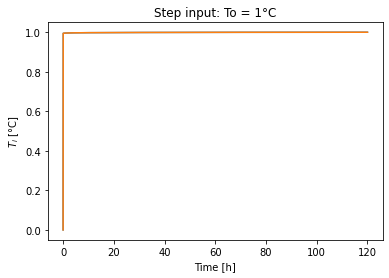

In [61]:
y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time [h]',
       ylabel='$T_i$ [°C]',
       title='Step input: To = 1°C')
plt.show()

In [62]:
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
print('Steady-state indoor temperature obtained with:')
print(f'- DAE model: {ytc[6]:.4f} °C')
print(f'- response to step input:{float(y_exp[:, -2]):.4f} °C')

Steady-state indoor temperature obtained with:
- DAE model: 1.0484 °C
- response to step input:0.9996 °C


## Simulation with weather data

In [63]:
filename = 'FRA_Lyon.074810_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-02-05 18:00:00'

# Read weather data from Energyplus .epw file
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (
    weather.index < end_date)]

In [64]:
surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
albedo = 0.2
rad_surf1 = dm4bem.sol_rad_tilt_surf(weather, surface_orientation, albedo)
rad_surf1['Φt1'] = rad_surf1.sum(axis=1)

In [65]:
data = pd.concat([weather['temp_air'], rad_surf1['Φt1']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})

In [66]:
data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])

In [67]:
t = dt * np.arange(data.shape[0])

In [68]:
ε_wLW = 0.9     # long wave wall emmisivity (concrete)
α_wSW = 0.2     # absortivity white surface
ε_gLW = 0.9     # long wave glass emmisivity (glass pyrex)
τ_gSW = 0.83    # short wave glass transmitance (glass)
α_gSW = 0.1     # short wave glass absortivity
σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant
Fwg = 1 / 5     # view factor wall - glass

In [69]:
u = pd.concat([data['To'], data['To'], data['To'], data['Ti'], data['To'], data['To'], data['To'], data['To'],
               α_wSW * (l1+2*L1)*h * data['Φt1'], α_wSW * (l1+2*L1)*h * data['Φt1'], data['Qa'],
               τ_gSW * α_wSW * S_glass * data['Φt1'], α_wSW * S_door * data['Φt1'], α_wSW * S_door * data['Φt1'],
               α_wSW * l2*h * data['Φt1'], α_wSW * l2*h * data['Φt1'], 
               α_wSW * S_door * data['Φt1'], α_wSW * S_door * data['Φt1'],
               α_wSW * (L2+l2)*h * data['Φt1'], α_wSW * (L2+l2)*h * data['Φt1'], 
               α_wSW * L2*h * data['Φt1'], α_wSW * L2*h * data['Φt1'], 
               α_wSW * (L2+l3)*h * data['Φt1'], α_wSW * (L2+l3)*h * data['Φt1'], 
               τ_gSW * α_wSW * S_glass * data['Φt1'], 
               α_wSW * l3*h * data['Φt1'], α_wSW * l3*h * data['Φt1'], 
               α_wSW * S_door * data['Φt1'], α_wSW * S_door * data['Φt1']], axis=1)
print(np.shape(u))

(717301, 29)


In [70]:
temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])

In [71]:
for k in range(u.shape[0] - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k]\
        + dt * Bs @ u.iloc[k, :]

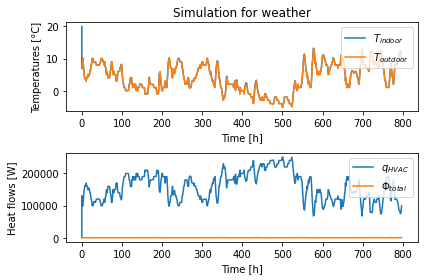

In [72]:
y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
q_HVAC = Kp * (data['Ti'] - y_exp[0, :])

fig, axs = plt.subplots(2, 1)
# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
           ylabel='Temperatures [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_HVAC, label='$q_{HVAC}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
           ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()